# Wina i ich klasyfikacja
## Autorzy
- Damian Kijańczuk s20154
- Szymon Ciemny    s21355

## Cel zadania
Kozystając z SVM oraz Drzew Decyzyjnych, przewidzieć jakoś wina.

## Przygotowanie środowiska
Oprócz python3, potrzebne nam będą paczki:
- pandas
- numpy
- sklearn
- matplotlib

## [Dane](https://machinelearningmastery.com/standard-machine-learning-datasets/)

## Przygotowanie danych

In [84]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv("dane1.csv", delimiter=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Podzielmy dane na wejściowe(X), wyjściowe(Y) oraz zbiór od trenowania i testowania. 

In [85]:
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## SVC (Support Vector Classification)
Na sam początek spróbujmy przewidzieć jakość wina za pomocą wektorów nośnych.
Skorzystamy oczywiście z modułu 'sklearn.svm' który wszystko za nas zrobi.

In [86]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC().fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.48435374149659866

Dokładność tego modelu wynosi tylko ~48% co nie jest dobrym wynikiem. Spróbujmy zastosować inną 'kernel function' i zobaczmy czy to polepszy wynik.

In [87]:
svc = SVC(kernel='linear').fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.5340136054421769

WOW!!! 😮 😮 😮

Z kernel 'linear', dokładność wzrosła do ~53%. 
Spróbujmy zatem z innymi kernelami. 
Moze da to JESZCZE LEPSZE efekty. 🤔

In [88]:
svc = SVC(kernel='poly', degree=5, C=1).fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.48027210884353744

In [89]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1).fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

/Users/damiankijanczuk/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.4782312925170068

Niestety zaden z innych kerneli nie polepszył dokładności. 😭 😭 😭

Spróbujmy zatem przedstawić SVC na wykresie. Niestety by to zrobić będziemy musieli ograniczyć dane wejściowe do 2 cech. 😔 
Dowiedzmy się więc jakie cechy mają największą wagę.

<AxesSubplot:>

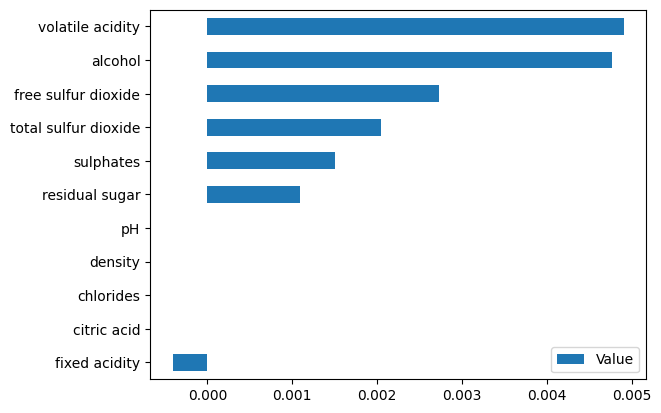

In [90]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svc, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value']).plot.barh()

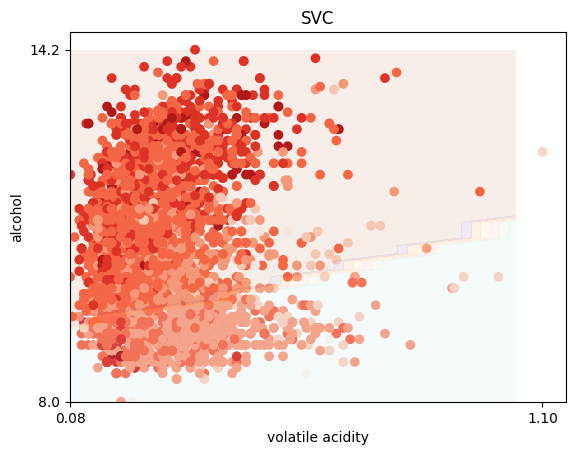

In [91]:
from sklearn import svm
import numpy as np
from sklearn import preprocessing

X = df[["volatile acidity","alcohol"]].to_numpy()
y = df['quality'].to_numpy()

svc = svm.SVC().fit(X, y) # Default kernel is 'rbf'

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Reds)
plt.xlabel('volatile acidity')
plt.ylabel('alcohol')
plt.xticks([x_min,x_max])
plt.yticks([y_min, y_max])
plt.title('SVC')

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.1)

plt.show()

Na powyzszym wykresie im bardziej czerwony kolor tym lepiej ocieniane wino.
Mozemy z niego wyciągną pare interesujących informacji.
- Oprocz paru odstających win, najlepiej ocieniane mają duzą ilość alkoholu.
- Poziom 'volatile acidity' powinien być niski gdy w winie jest mało alkoholu, lecz wraz z jego wzrostem poziom 'volatile acidity', moze (a nawet powinien) wzrosnąć. 

Spróbujmy przedstawić dane w podobny sposób do powyzszego, ale 
zmieńmy jedną z cech na mniej znaczącą.

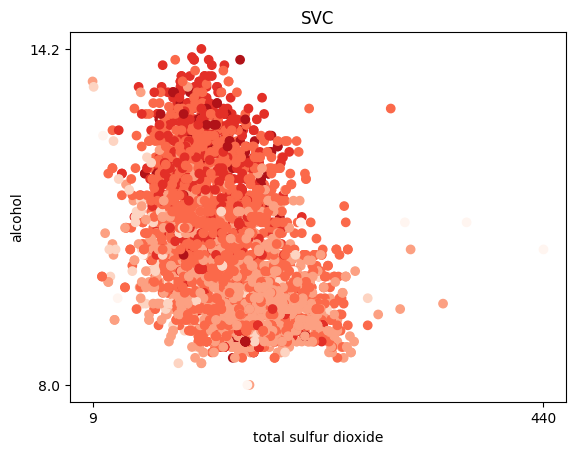

In [95]:
X = df[["total sulfur dioxide","alcohol"]].to_numpy()
y = df['quality'].to_numpy()

svc = svm.SVC().fit(X, y)

x_min, x_max = X[:, 0].min()-1, X[:, 0].max()
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Reds)
plt.xlabel('total sulfur dioxide')
plt.ylabel('alcohol')
plt.xticks([x_min+1,x_max])
plt.yticks([y_min+1, y_max])
plt.title('SVC')
plt.show()

Gdy zmieniliśmy 'volatile acidity' na 'total sulfur dioxide' nadal, im więcej alkoholu tym lepsze wino, lecz w tym przypadku 'total sulfur dioxide' powinien być w wąskim przedziale.

## Decision Trees
Teraz uzyjemy innego modelu by przewidzieć jakość wina.

In [93]:
from utilities import visualize_classifier
from sklearn.metrics import classification_report


X = df[["total sulfur dioxide","alcohol"]].to_numpy()
y = df['quality'].to_numpy()

class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=100)

classifier = DecisionTreeClassifier(random_state=0,max_depth=8)
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
accuracy_score(y_test, y_test_pred)


0.5027210884353741

Wynik ~50% jest lepszy od większości lecz nadal nie pobił rekordu ~54%.

Spróbujmy zatem przedstawić dane na wykresie.

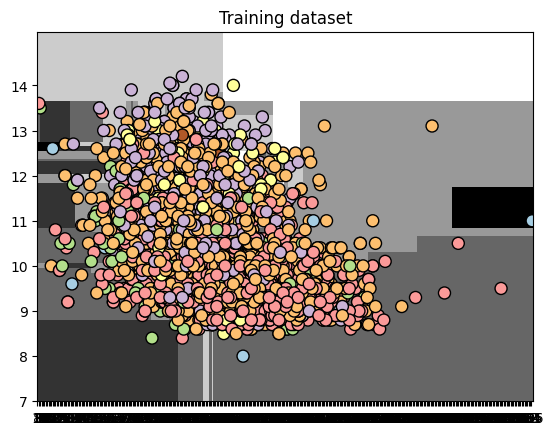

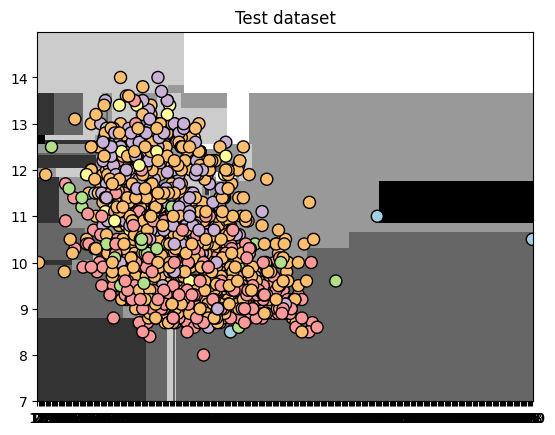

In [94]:
visualize_classifier(classifier, X_train, y_train, 'Training dataset')
visualize_classifier(classifier, X_test, y_test, 'Test dataset')
plt.show()

## Podsumowanie

Dokładność przedstawionych modeli jest niska (max ~54%), postanowiliśmy więc porównać naszą pracę z innymi by zobaczyć jak wysoką dokładność mona uzyskać. Oto najlepsze wyniki:
- [Te same dane](https://www.analyticsvidhya.com/blog/2021/04/wine-quality-prediction-using-machine-learning/)
| 62%
- [Podobne dane](https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/)
| 58%

Jak widać inne modele mogą uzyskać lepsze wyniki, lecz nie są one blisko 100%.